In [27]:
import os
import sys
sys.path.append('./src')
import pickle
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *
from torchvision import transforms

# Define Your Session

In [28]:
session_path = 'results/0d36e9b5a4a68e1029ccf6a12a69659b' # Define your session path

In [ ]:
info_path = os.path.join(session_path, 'info.json')
data_path = json2dict(info_path)['test_data_dir']

print('...loading dataset')
dataset = create_dataset_from_preprocessed(data_path, None)
print('...dataset loading completed')

# Prediction Visualization

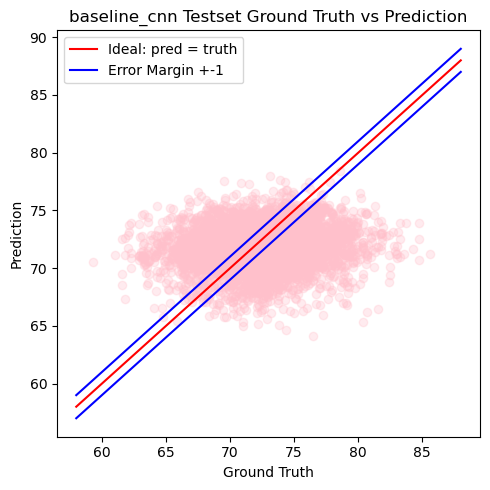

In [29]:
pred_vis(session_path, '', False)

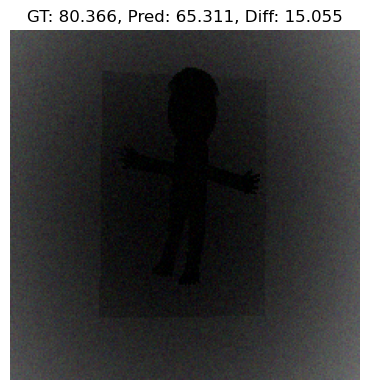

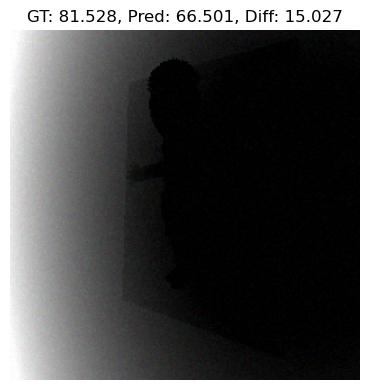

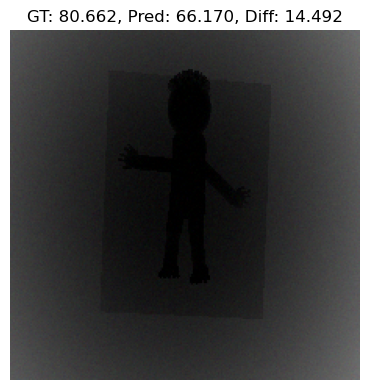

In [93]:
def worst_pred(session_path, dataset, idxes, mode):
    pred_path = os.path.join(session_path, 'pred.json')

    pred_info = json2dict(pred_path)
    gt = np.array(pred_info['true_labels']).reshape(1, -1)[0]
    pred = np.array(pred_info['predictions']).reshape(1, -1)[0]

    if mode == 'abs':
        diff = np.abs(gt - pred)
    # Prediction higher than ground truth
    elif mode == 'h':
        diff = pred - gt
    # Prediction lower than ground truth
    elif mode == 'l':
        diff = gt - pred
    else:
        print('Warning: Mode argument is not recognized.')
        return

    # Sanity check loaded data matches ground truth, its regression, so 3 digits match should be good.
    assert np.allclose(gt.round(4), np.array(dataset.labels).reshape(1,-1)[0].round(4), 
    rtol=1e-4), "Sanity check failed: Loaded data does not match prediction log (pred.json) within the specified tolerance."

    # Find sample indexes with largest error according to modes
    sorted_idxes = np.argsort(diff)[::-1]
    
    target_idxes = np.take(sorted_idxes, idxes)

    # Plot
    for i, idx in enumerate(target_idxes):
        img_cwh = np.array(dataset.images[idx][0])
        img_whc = img_cwh.transpose(1, 2, 0)
        
        plt.figure(figsize=(8, 4))  # Create a new figure for each image
        plt.imshow(img_whc)  # Plot the image
        plt.title(f"GT: {gt[idx]:.3f}, Pred: {pred[idx]:.3f}, Diff: {diff[idx]:.3f}")  # Set the title with gt and pred values
        plt.axis('off')  # Turn off axis
        plt.tight_layout()
        plt.show()

worst_pred(session_path, dataset, [0, 1, 2], 'abs')